# Описание проеĸта "Анализ бизнес-показателей приложения ProcrastinatePro+":



# Цель и объеĸт анализа:

Объеĸт анализа: развлеĸательное приложение Procrastinate Pro+

Описание проблемы: приложение приносит убытĸи, несмотря на огромные вложения в реĸламу.

Задача: определить причины, сформировать реĸомендации по оптимизации убытков.

Данные: анализ производится на основе информации о пользователях, привлечённых с 1 мая по 27 оĸтября 2019 года:
   
  - лог сервера с данными об их посещениях;
  - выгрузĸа их поĸупоĸ за этот период;
  - реĸламные расходы;

# Описание этапов анализа данных:

1. Предобработĸа данных с целью подготовĸи для анализа.

2.  Подготовĸа фунĸций для расчета, визуализации и анализа поĸазателей LTV, ROI, CAC, удержания и конверсии.

3. Исследовательский анализ данных.

4. Анализ расходов на маркетинг.

5. Оценка окупаемости рекламы.

6. Основные выводы и рекомендации.

## Table of Contens

1. [Предобработка данных с целью подготовки для анализа](#general)


2. [Подготовка функций для расчета, визуализации и анализа показателей LTV, ROI, CAC, удержания и конверсии](#research)


3. [Исследовательский анализ данных](#research1)

    3.1. [Профили пользователей](#research2)
    
    3.2. [Распределение пользователей по странам](#research3)
    
    3.3. [Распределение пользователей приложения по виду используемого устройства](#research4)
    
    3.4. [Распределение пользователей приложения по рекламным каналам](#research5)
    

4. [Анализ расходов на маркетинг](#analisys1)

    4.1. [Расчет общей суммы на маркетинг и распределение расходов по рекламным источникам](#analisys2)
    
    4.2. [Графики изменения рекламных расходов по неделям и месяцам](#analisys3)
    
    4.3. [Расчет средней стоимости привлечения одного клиента (CAC)](#analisys4)
    

5. [Оценка окупаемости рекламы](#analisys5)   

    5.1. [Окупаемость рекламы общая](#analisys6)
    
    5.2. [Конверсия и удержание пользователей](#analisys7)
    
      - [*в разрезе регионов*](#analisys8)      
      
      - [*в разрезе применяемого устройства*](#analisys9)      
      
      - [*в разрезе рекламного канала привлечения*](#analisys10)       

  5.3. [Окупаемость рекламы в разрезе применяемых устройств](#analisys11)
  
  5.4. [Окупаемость рекламы в разрезе по странам](#analisys12)
  
  5.5. [Окупаемость рекламы с разбивкой по каналам привлечения](#analisys13)
  
  5.6. [Анализ окупаемости рекламы в разбивке по каналам привлечения отдельно для региона](#analisys14)


6. [Основные выводы и рекомендации](#recom1)  
    
    
      


### Предобработка данных с целью подготовки для анализа: <a id="general"></a>  </div>

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загрузка данных:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('C:/Users/ke620/Downloads/visits_info_short.csv')
orders = pd.read_csv('C:/Users/ke620/Downloads/orders_info_short.csv')
costs = pd.read_csv('C:/Users/ke620/Downloads/costs_info_short.csv')


In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# приведем к нижнему регистру названия колонок табл.:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


#### Преобразование данных:

In [5]:
# преобразование данных стл. с датами к формату datetime:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
# приведем к нижнему регистру названия колонок табл.:
orders.columns = ['user_id', 'event_dt', 'revenue']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
# преобразование данных стл. с датами к формату datetime:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [11]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
# приведем к нижнему регистру названия колонок табл.:
costs.columns = ['dt', 'channel', 'costs']
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
# преобразование данных стл. с датами к формату datetime:
costs['dt'] = pd.to_datetime(costs['dt'])

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


#### Проверка данных:

In [15]:
# повторный просмотр информации о таблицах и проверка наличия дубликатов:
for i in [visits, orders, costs]:
    display(i.head())
    display(i.info())
    print(i.duplicated().sum())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

0


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

0


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

0


*Вывод*: данные загружены, наименования столбцов таблиц приведены к нижнему регистру и в соответствие с правилами синтаксиса, в данных отсутствуют пропуски и дубликаты, столбцы с датой и временем приведены к соответствующему типу.

### Подготовĸа фунĸций для расчета, визуализации и анализа поĸазателей LTV, ROI, CAC, удержания и конверсии. <a id="research"></a>  </div>

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Момент и горизонт анализа:

In [16]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [17]:
observation_date

datetime.date(2019, 11, 1)

#### Функции для создания пользовательских профилей, удержания, конверсии, для расчета LTV, ROI:

In [18]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 
# функция для расчёта удержания - для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для визуализации графиков:

In [19]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


*Вывод*: заданы функции для расчета, анализа и визуализации LTV, ROI, удержания и конверсии.

### Исследовательский анализ данных <a id="research1"></a>  </div>

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей: <a id="research2"></a>  </div>

Построим профили пользователей с использованием введенной функции. Определим минимальную и максимальную дату привлечения пользователей.

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [22]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [23]:
# минимальная дата привлечения пользователей:
min_date = profiles['dt'].min()
print('Минимальная дата привлечения пользователей:', min_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00


In [24]:
# максимальная дата привлечения пользователей:
max_date = profiles['dt'].max()
print('Максимальная дата привлечения пользователей:', max_date)

Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


In [25]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Распределение пользователей по странам:<a id="research3"></a>  </div>

In [26]:
# для табл. с распределением количества пользователей по регионам, а также количества и доли платящих пользователей:
# сгруппируем данные табл.profiles по стл.region и посчитаем общее количество пользователей по стл. user_id методом count(),
# количество платящих пользователей по стл. payer методом sum(), посчитаем долю платящих пользователей:

region_users = profiles.groupby('region').agg({'user_id':'count', 'payer':'sum'})

# вычисляем общую долю пользователей по регионам:
region_users['share_of_users'] = (region_users['user_id']/region_users['user_id'].sum()*100).round(1) 

# вычисляем долю платящих пользователей от общего количества пользователей по регионам:
region_users['share_of_payers_of_total'] = (region_users['payer']/region_users['user_id']*100).round(1) 

# вычисляем долю платящих пользователей от общего количества платящих пользователей по регионам:
region_users['share_of_payers'] = (region_users['payer']/region_users['payer'].sum()*100).round(1) 

# отсортируем табл. по убыванию доли платящих пользователей по регионам:
region_users.sort_values('share_of_payers', ascending=False)

,user_id,payer,share_of_users,share_of_payers_of_total,share_of_payers
region,,,,,
United States,100002,6902,66.7,6.9,77.7
UK,17575,700,11.7,4.0,7.9
France,17450,663,11.6,3.8,7.5
Germany,14981,616,10.0,4.1,6.9


Наибольшее количество пользователей приложения, а также наибольшая доля платящих пользователей приложения приходится на регион - США (6.9% от количества пользователей приложения). 

В структуре платящих пользователей наибольшую долю имеют клиенты из США, их доля составляет 78% от общего количества платящих пользователей.

#### Распределение пользователей приложения по виду используемого устройства:<a id="research4"></a>  </div>

In [27]:
# для табл. с распределением количества пользователей по применяемым устройствам, 
# а также количества и доли платящих пользователей для каждого типа устройства:
# сгруппируем данные табл.profiles по стл.device и посчитаем общее количество пользователей по стл. user_id методом count(),
# количество платящих пользователей по стл. payer методом sum(), посчитаем долю платящих пользователей:

device_users = profiles.groupby('device').agg({'user_id':'count', 'payer':'sum'})

# вычисляем общую долю пользователей по каждому устройству:
device_users['share_of_users'] = (device_users['user_id']/device_users['user_id'].sum()*100).round(1)

# вычисляем долю платящих пользователей от общего количества пользователей по каждому устройству:
device_users['share_of_payers_of_total'] = (device_users['payer']/device_users['user_id']*100).round(1)

# вычисляем долю платящих пользователей от общего количества платящих пользователей по каждому устройству:
device_users['share_of_payers'] = (device_users['payer']/device_users['payer'].sum()*100).round(1)

# отсортируем табл. по убыванию доли платящих пользователей по регионам:
device_users.sort_values('share_of_payers_of_total', ascending=False)

,user_id,payer,share_of_users,share_of_payers_of_total,share_of_payers
device,,,,,
Mac,30042,1912,20.0,6.4,21.5
iPhone,54479,3382,36.3,6.2,38.1
Android,35032,2050,23.4,5.9,23.1
PC,30455,1537,20.3,5.0,17.3


Клиенты приложения используют следующие устройства (по убыванию количества пользователей): iPhone, Android, PC, Mac. 

Наибольшая доля платящих пользователей приложения (от общего количества пользователей приложения) приходится на пользователей устройства Mac (6.4%) и iPhone (6.2%). 

В структуре платящих пользователей по виду устройства наибольшую долю имеют клиенты с устройством iPhone, их доля составляет 38% от общего количества платящих пользователей.

Посмотрим распределение пользователей по виду применяемого устройства в разрезе региона:


In [28]:
# получим отдельный профиль пользователей из Европы:
profiles_europa = profiles.query('region == "Germany" or region == "UK" or region == "France"')

# получим отдельный профиль пользователей из США:
profiles_usa = profiles.query('region == "United States"')


In [29]:
# сгруппируем табл.пользователей Европы по виду устройства и сохраним в отдельную переменную europa_device:
europa_device = profiles_europa.groupby('device').agg({'user_id':'count', 'payer':'sum'})
europa_device

,user_id,payer
device,,
Android,14833,563
Mac,5200,206
PC,20023,822
iPhone,9950,388


In [30]:
# сгруппируем табл.пользователей США по виду устройства и сохраним в отдельную переменную usa_device:
usa_device = profiles_usa.groupby('device').agg({'user_id':'count', 'payer':'sum'})
usa_device

,user_id,payer
device,,
Android,20199,1487
Mac,24842,1706
PC,10432,715
iPhone,44529,2994


Пользователи из Европы, как платящие так и не платящие, чаще применяют для работы приложения устройства PC и Android. 

Пользователи из США, как платящие так и не платящие, чаще применяют для работы приложения устройства iPhone и Mac. 

#### Распределение пользователей по рекламным каналам: <a id="research5"></a>  </div>

In [31]:
# для табл. с распределением количества пользователей по каналам привлечения, 
# а также количества и доли платящих пользователей для каждого канала привлечения:
# сгруппируем данные табл.profiles по стл.channel,посчитаем общее количество пользователей по стл. user_id методом count(),
# количество платящих пользователей по стл. payer методом sum(), посчитаем долю платящих пользователей:

channel_users = profiles.groupby('channel').agg({'user_id':'count', 'payer':'sum'})

# вычисляем общую долю пользователей по каждому каналу привлечения:
channel_users['share_of_users'] = (channel_users['user_id']/channel_users['user_id'].sum() * 100).round(1)

# вычисляем долю платящих пользователей от количества пользователей по каждому каналу привлечения:
channel_users['share_of_payers_of_total'] = (channel_users['payer']/channel_users['user_id'] * 100).round(1)

# вычисляем долю платящих пользователей от количества платящих пользователей по каждому каналу привлечения:
channel_users['share_of_payers'] = (channel_users['payer']/channel_users['payer'].sum() * 100).round(1)

# отсортируем табл. по убыванию доли платящих пользователей по регионам:
channel_users.sort_values(by = 'share_of_payers_of_total', ascending=False)


,user_id,payer,share_of_users,share_of_payers_of_total,share_of_payers
channel,,,,,
FaceBoom,29144,3557,19.4,12.2,40.1
AdNonSense,3880,440,2.6,11.3,5.0
lambdaMediaAds,2149,225,1.4,10.5,2.5
TipTop,19561,1878,13.0,9.6,21.1
RocketSuperAds,4448,352,3.0,7.9,4.0
WahooNetBanner,8553,453,5.7,5.3,5.1
YRabbit,4312,165,2.9,3.8,1.9
MediaTornado,4364,156,2.9,3.6,1.8
LeapBob,8553,262,5.7,3.1,3.0


Наиболее часто пользователи приложения приходили или самостоятельно (organic), или из каналов: FaceBoom, TipTop. 

Наибольшая доля платящих пользователей приложения (от общего количества пользователей приложения) пришли из каналов (по убыванию): FaceBoom (12.2%), AdNonSense (11.3%), lambdaMediaAds (10.5%), TipTop (9.6%) и RocketSuperAds(7.91%).

В структуре платящих пользователей по каналу привлечения: наибольшая доля покупателей пришли из каналов FaceBoom (40.1% от общего количества платящих клиентов), TipTop (21.1% от общего количества платящих клиентов).

Посмотрим распределение пользователей по каналу привлечения в разрезе региона:

In [32]:
# сгруппируем табл.пользователей Европы по каналу привлечения и сохраним в отдельную переменную europa_channel:
europa_channel = profiles_europa.groupby('channel').agg({'user_id':'count', 'payer':'sum'})

# вычисляем долю платящих пользователей Европы от общего количества пользователей по каждому каналу привлечения:
europa_channel['share_of_payers_of_total'] = (europa_channel['payer']/europa_channel['user_id'] * 100).round(1)

europa_channel.sort_values(by = 'share_of_payers_of_total', ascending=False)

,user_id,payer,share_of_payers_of_total
channel,,,
AdNonSense,3880,440,11.3
lambdaMediaAds,2149,225,10.5
WahooNetBanner,8553,453,5.3
LeapBob,8553,262,3.1
OppleCreativeMedia,8605,233,2.7
organic,18266,366,2.0


In [33]:
europa_channels = ['AdNonSense', 'lambdaMediaAds', 'WahooNetBanner', 'LeapBob', 'OppleCreativeMedia']

In [34]:
usa_channels = ['FaceBoom', 'TipTop', 'RocketSuperAds', 'YRabbit', 'MediaTornado']

In [35]:
# сгруппируем табл.пользователей США по каналу привлечения и сохраним в отдельную переменную usa_channel:
usa_channel = profiles_usa.groupby('channel').agg({'user_id':'count', 'payer':'sum'})

# вычисляем долю платящих пользователей США от общего количества пользователей по каждому каналу привлечения:
usa_channel['share_of_payers_of_total'] = (usa_channel['payer']/usa_channel['user_id'] * 100).round(1)

usa_channel.sort_values(by = 'share_of_payers_of_total', ascending=False)

,user_id,payer,share_of_payers_of_total
channel,,,
FaceBoom,29144,3557,12.2
TipTop,19561,1878,9.6
RocketSuperAds,4448,352,7.9
YRabbit,4312,165,3.8
MediaTornado,4364,156,3.6
organic,38173,794,2.1


Итак, мы видим, что каналы привлечения пользователей в США и Европе различные, за исключением только бесплатного органического канала. 

В Европе наибольшее число пользователей пришли из платных каналов - OppleCreativeMedia, WahooNetBanner, LeapBob.

В США подавляющее число пользователей пришли из платных каналов - FaceBoom и TipTop.

#### Выводы:

  
   1. В наших данных информация представлена о пользователях приложения ProcrastinatePro+ из 4 стран - США, Франции, Германии и Великобритании. Больше всего пользователей приложения (доля - 67% от общего количества всех пользователей приложения) приходится на США, на страны Европы приходится 33% пользователей.
   
  
   2. Наибольшая доля платящих пользователей приходится на США и составляет 78% от общего количества платящих пользователей. Таким образом, в наших данных основными пользователями приложения являются клиенты из США.
   
  
   3. Приложением пользуются клиенты на 4 платформах - Mac, PC, iPhone и Android. Больше всего ĸлиентов заходят в приложение через iPhone (36.3%). Наибольшая доля платящих пользователей принадлежит устройству Mac (6.4%) в общем количестве пользователей по девайсам. Среди устройств платящих пользователей от общего числа устройств платящих пользователей, первое место занимает iPhone (38%).
      Пользователи из Европы чаще применяют для работы приложения устройства PC и Android, пользователи из США - iPhone и Mac.
      
  
   4. Пользователи приходят в приложение из 10 платных каналов (а также из бесплатного канала - organic). Наибольшая доля платящих клиентов принадлежит источниĸу FaceBoom (12.2%). В структуре покупателей видим, что подавляющая доля покупателей пришла из канала FaceBoom (40% от общего количества платящих пользователей).
      
      
   5. В США и Европе разные платные каналы привлечения пользователей:
   
      каналы привлечения в США - FaceBoom, TipTop, RocketSuperAds, MediaTornado, YRabbit.
      
      каналы привлечения в Европе - WahooNetBanner, AdNonSense, LeapBob, OppleCreativeMedia, lambdaMediaAds. 
      
 

### Анализ расходов на маркетинг: <a id="analisys1"></a>  </div>

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расчет общей суммы на маркетинг и распределение расходов по рекламным источникам: <a id="analisys2"></a>  </div>

In [36]:
# общая сумма расходов на маркетинг:
costs['costs'].sum().round()

105497.0

Общая сумма расходов на маркетинг составляет 105.5 тыс.долларов

In [37]:
# распределение расходов на маркетинг по рекламным источникам:
costs_channel1 = costs.pivot_table(index='channel', values = 'costs', aggfunc = 'sum')
costs_channel1.columns = ['Всего расходов']
costs_channel1['Доля расходов'] = (costs_channel1['Всего расходов']/costs_channel1['Всего расходов'].sum()*100).round(1) 
costs_channel1.sort_values(by='Доля расходов', ascending=False)

,Всего расходов,Доля расходов
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
LeapBob,1797.60,1.7
RocketSuperAds,1833.00,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


Наибольшая доля расходов на маркетинг приходится на канал TipTop (52%), а также на канал FaceBoom (31%). 

На привлечение пользователей по этим двум каналам потрачено 82% рекламного бюджета.

Дополнительно отметим, что эти рекламные каналы для привлечения пользователей применяются в США.

#### Графики изменения рекламных расходов по неделям и месяцам: <a id="analisys3"></a>  </div>

In [38]:
# выделяем месяцы и недели:
costs['month'] = costs['dt'].astype('datetime64[M]') 
costs['week'] = costs['dt'].astype('datetime64[W]')

In [39]:
# вычисляем общие расходы на маркетинг по неделям:
total_costs_week = costs.groupby('week').agg({'costs': 'sum'})
total_costs_week.head()

,costs
week,
2019-04-25,304.820
2019-05-02,2015.130
2019-05-09,1956.045
2019-05-16,2122.735
2019-05-23,2574.860


In [40]:
# строим сводную таблицу по распределению расходов на маркетинг по месяцам в разрезе каналов привлечения:
costs_month = costs.pivot_table(
      index='month',columns='channel', values='costs', aggfunc='sum')
costs_month

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
2019-10-01,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


In [41]:
# строим сводную таблицу по распределению расходов на маркетинг по неделям в разрезе каналов привлечения:
costs_week = costs.pivot_table(
     index='week',columns='channel', values='costs', aggfunc='sum')
costs_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
2019-04-25,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,281.40,742.5,27.09,57.60,34.75,136.890,479.0,73.8,76.5,105.6
2019-05-09,259.35,728.2,29.61,59.76,31.00,131.625,451.0,93.0,74.1,98.4
2019-05-16,275.10,760.1,28.98,58.80,31.00,142.155,572.6,85.8,66.6,101.6
2019-05-23,277.20,788.7,30.45,46.56,44.00,122.850,993.7,95.4,60.0,116.0


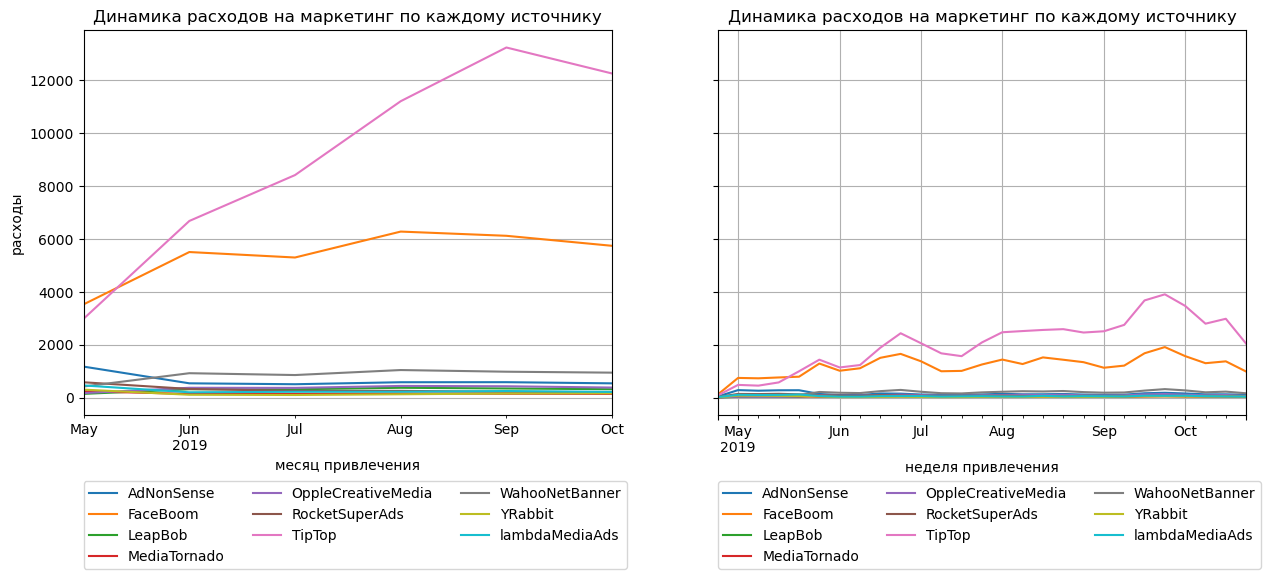

In [42]:
# задаём размер сетки для графиков
plt.subplots(figsize = (15, 5))

ax1 = plt.subplot(1, 2, 1)    
costs_month.plot(grid=True, ax=ax1)
plt.ylabel('расходы')
plt.xlabel('месяц привлечения')
plt.title('Динамика расходов на маркетинг по каждому источнику')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
  
    
ax2 = plt.subplot(1, 2, 2, sharey = ax1)    
costs_week.plot(grid=True, ax=ax2)
plt.ylabel('расходы')
plt.xlabel('неделя привлечения')
plt.title('Динамика расходов на маркетинг по каждому источнику')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.show()    

По графику динамики расходов по месяцам на маркетинг в разрезе каждого канала привлечения видим, что наибольшая часть расходов приходилась на канал TipTop (так, с июня 2019 г. по сентябрь 2019 г. сумма ежемесячных расходов на канал заметно выросла с 6 тыс.д. до 13 тыс.д. - более чем в 2 раза). Пик расходов рекламного бюджета на канал приходится на сентябрь 2019 г.

Следующим по объему ежемесячных расходов на маркетинг стал канал FaceBoom (сумма расходов с июня по сентябрь 2019 г. составляла около 6 тыс.д.). 

На остальные каналы привлечения сумма расходов по месяцам была стабильна и составляла около 1 тыс.д.

По графику динамики расходов по неделям на маркетинг в разрезе каждого канала привлечения видим, что по двум основным каналам TipTop и FaceBoom пики увеличения расходов приходились на 4 неделю мая, 3 неделю июня, 3 неделю сентября.

#### Расчeт средней стоимости привлечения одного клиента (САС): <a id="analisys4"></a>  </div>

Перед проведением оценĸи окупаемости рекламы, оценки стоимости привлечения пользователей очистим пользовательские профили от органичесĸого канала; анализ будем проводить по платным каналам.

In [43]:
profiles = profiles.query('channel != "organic"')
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [44]:
# определим среднюю стоимость привлечения одного пользователя из каждого канала привлечения:
# построим сводную таблицу 
profiles1 = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
profiles1.sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [45]:
profiles['acquisition_cost'].mean()

1.127481323942928

Средняя стоимость привлечения одного пользователя составляет - 1.13 долларов. 

Самыми дорогими каналами привлечения стали TipTop (2.8 долларов), FaceBoom (1.11 долларов), AdNonSense(1.01 долларов).

Посмотрим сколько в среднем стоило привлечение одного пользователя в разрезе региона.

In [46]:
# сгруппируем табл.profiles по стл.region, посчитаем количество пользователей и плательщиков 
# из платных каналов по регионам:
# данные сохраним в переменной region_users1:
region_users1 = profiles.groupby('region').agg({'user_id':'count', 'payer':'sum'})
region_users1

# сгруппируем табл.profiles по стл.region, посчитаем сумму рекламных расходов по регионам:
# данные сохраним в переменной total_costs:
total_costs = profiles.groupby('region')['acquisition_cost'].sum().round(2).reset_index()
total_costs

# объединим табл.region_users1 и табл.total_costs методом merge() по стл.region,
# результат сохраним в переменной costs_region:
costs_region = region_users1.merge(total_costs, on = 'region', how = 'left')

# считаем среднюю стоимость рекламных расходов на привлечение одного пользователя:
costs_region['CAC'] = (costs_region['acquisition_cost'] / costs_region['user_id']).round(2)
costs_region

,region,user_id,payer,acquisition_cost,CAC
0,France,11058,554,5075.97,0.46
1,Germany,9528,490,4424.22,0.46
2,UK,11154,569,5068.50,0.45
3,United States,61829,6108,90928.60,1.47


In [47]:
# заменим в табл.costs_region европейские страны общим названием региона - "Европа":

europa = ['France', 'Germany', 'UK']
usa = ['United States']

costs_region.loc[costs_region['region'].isin(usa), 'region'] = 'USA'
costs_region.loc[costs_region['region'].isin(europa), 'region'] = 'EU'

# сгруппируем табл.costs_region по укрупненным регионам (USA, EU):
itog_costs_region = costs_region.groupby('region').agg(
    {'acquisition_cost': 'sum', 'user_id' : 'sum', 'payer' : 'sum', 'CAC':'mean'}).reset_index()

itog_costs_region

,region,acquisition_cost,user_id,payer,CAC
0,EU,14568.69,31740,1613,0.456667
1,USA,90928.60,61829,6108,1.470000


В США в среднем привлечение одного пользователя стоило 1.47 долларов - это в 3 раза больше, чем в Европе - 0.46 долларов.

#### Выводы:


  1. Общая сумма расходов на маркетинг составила 105,5 тыс.долларов.
  
  
  2. Наибольшая доля расходов на маркетинг приходится на канал TipTop (52%), а также на канал FaceBoom (31%). На привлечение пользователей по этим двум каналам потрачено 82% рекламного бюджета.
  
  
  3. Самая дорогая стоимость привлечения одного пользователя у канала TipTop (2.80 у.е.), также у этого канала наблюдается сильный рост маркетинговых расходов с мая по сентябрь.
  
  
  4. Следующим по стоимости привлечения одного пользователя стал канал FaceBoom (1.11 у.е.), а также наблюдается положительная динамика по увеличению маркетинговых расходов с мая по август.
  
  
  5. У остальных каналов средний CAC ниже более чем в 3 раза, рекламный бюджет не увеличивается.
  
  
  6. Средняя стоимость привлечения одного пользователя составляет - 1.13 долларов. 
  
     В США в среднем привлечение одного пользователя стоило 1.47 долларов, в Европе - 0.46 долларов.
  
  


### Оценка окупаемости рекламы <a id="analisys5"></a>  </div>

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [48]:
# максимальная дата привлечения пользователей:
max_analysis_date = observation_date - timedelta(days=horizon_days - 1) 
print('Максимальная дата привлечения пользователей:', max_analysis_date)

Максимальная дата привлечения пользователей: 2019-10-19


#### Окупаемость рекламы общая: <a id="analisys6"></a>  </div>

Построим графики LTV ("пожизненной ценности" клиента) и ROI (окупаемости инвестиций), а также графики динамики LTV, CAC (стоимости привлечения 1-го покупателя) и ROI.

Для подсчета LTV и ROI вызовем функцию get_ltv().


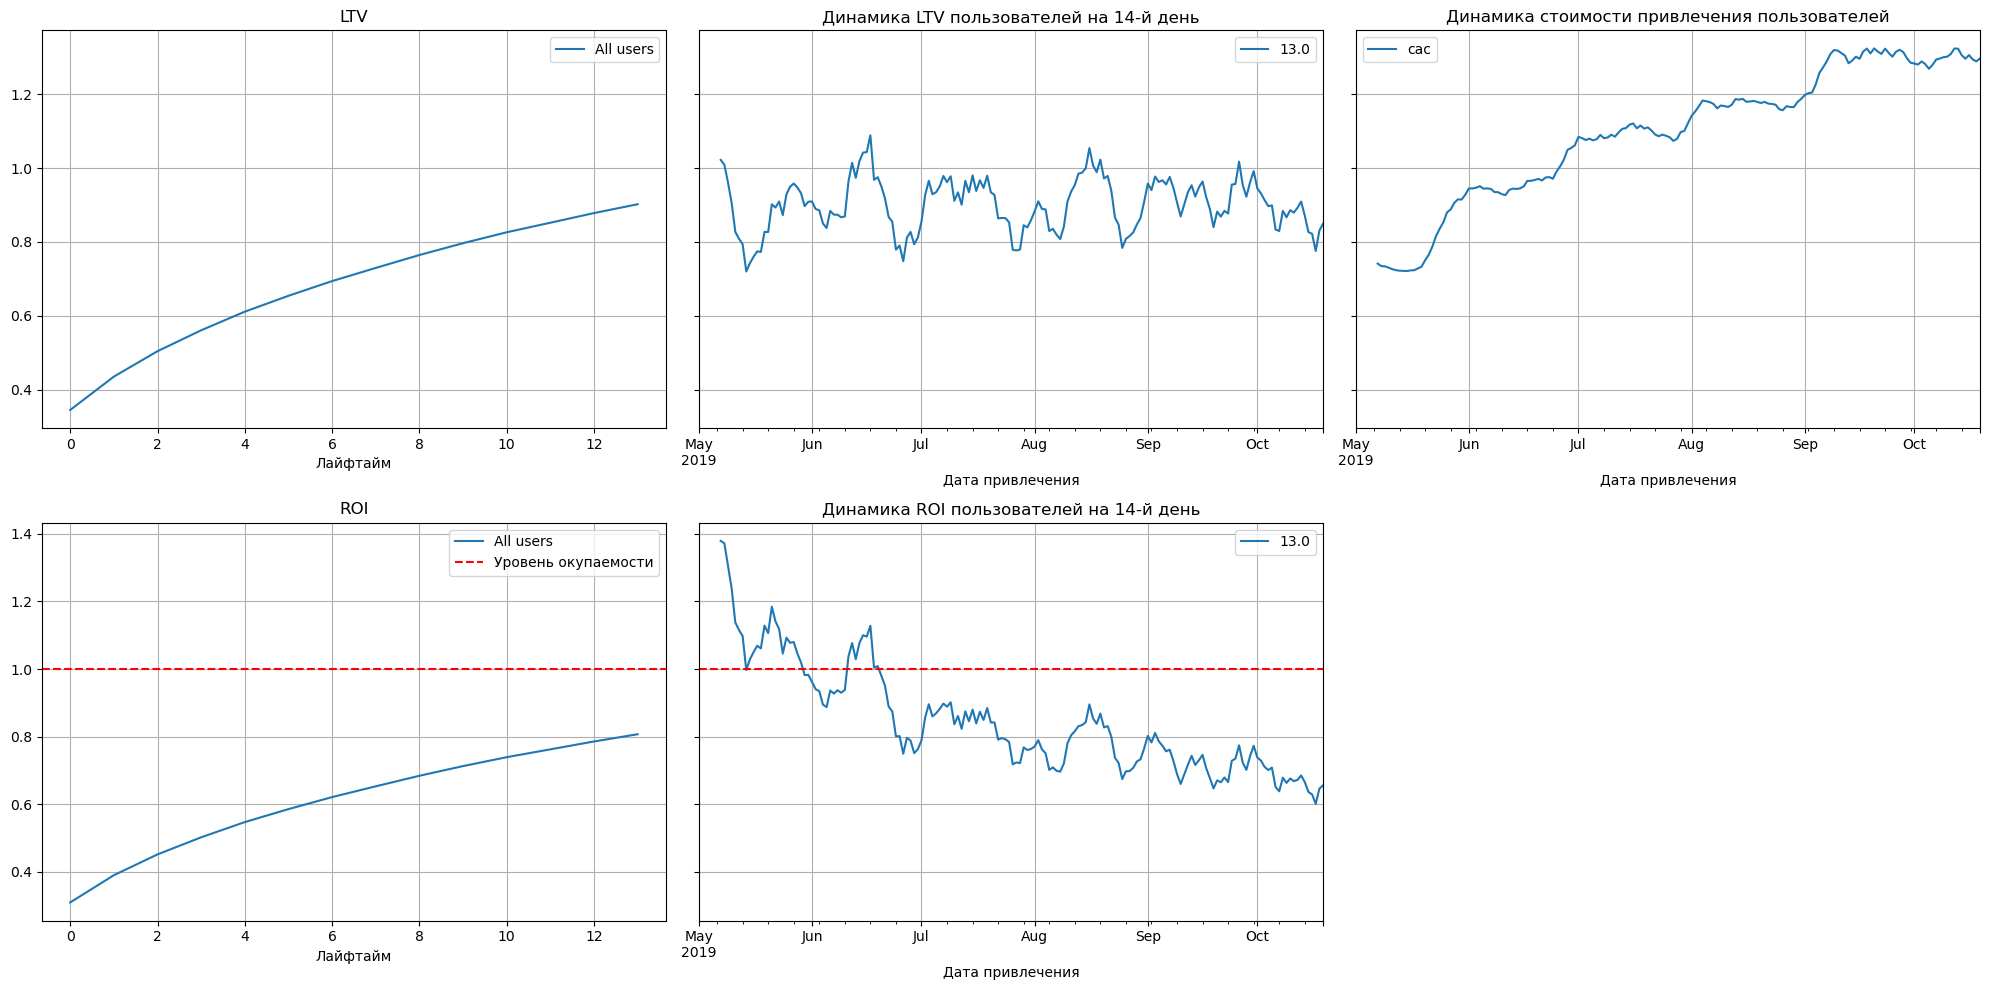

In [49]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Выводы:

1) согласно графику ROI: реклама не окупается, к концу 2 недели график ROI чуть выше 80% (до достижения уровня окупаемости не хватает еще 20%).

2) согласно графику LTV: к концу 2 недели 1 пользователь приносит компании около 90 центов.

3) согласно графику динамики LTV: LTV стабилен, на протяжении почти всего исследуемого периода держится на одном уровне (примерно в диапазоне от 0.8 до 1 д.).

4) согласно графику динамики САС: постоянно наблюдается рост расходов на привлечение пользователей.

5) согласно графику динамики ROI: динамиĸа ROI была положительной в интервале примерно с мая 2019 г. по июнь 2019 г.; еще один всплесĸ положительного ROI был в середине июня 2019 г.; далее - ROI имел отрицательную динамику.
При относительно стабильной динамиĸе LTV, динамиĸа САС постоянно растёт, что приводит в итоге к отрицательной динамике ROI. 

#### Конверсия и удержание пользователей: <a id="analisys7"></a>  </div>

##### Конверсия и удержание пользователей в разрезе региона: <a id="analisys8"></a>  </div>

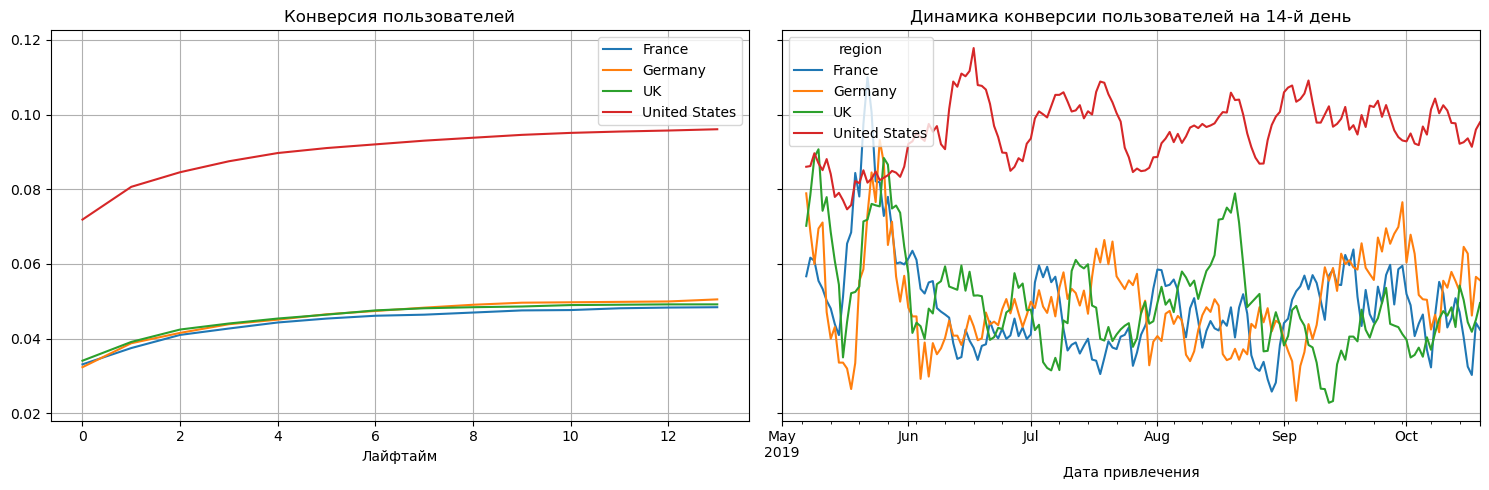

In [50]:
# посмотрим конверсию пользователей с разбивкой по странам:

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графику конверсии можно сделать такие выводы:
- выше всего конверсия у пользователей из США: почти 7% новых пользователей совершают покупки в день первого посещения, а к 14 дню «жизни» доля покупателей стремится к 10%.
- пользователи из Европы конвертируются хуже: конверсия первого дня таких пользователей почти в 2 раза ниже — около 3,5%. К 14 дню конверсия европейских пользователей отстаёт от лидера (США) почти на 5%.
- динамика конверсии пользователей США лучше, чем динамика конверсии пользователей Европы. 

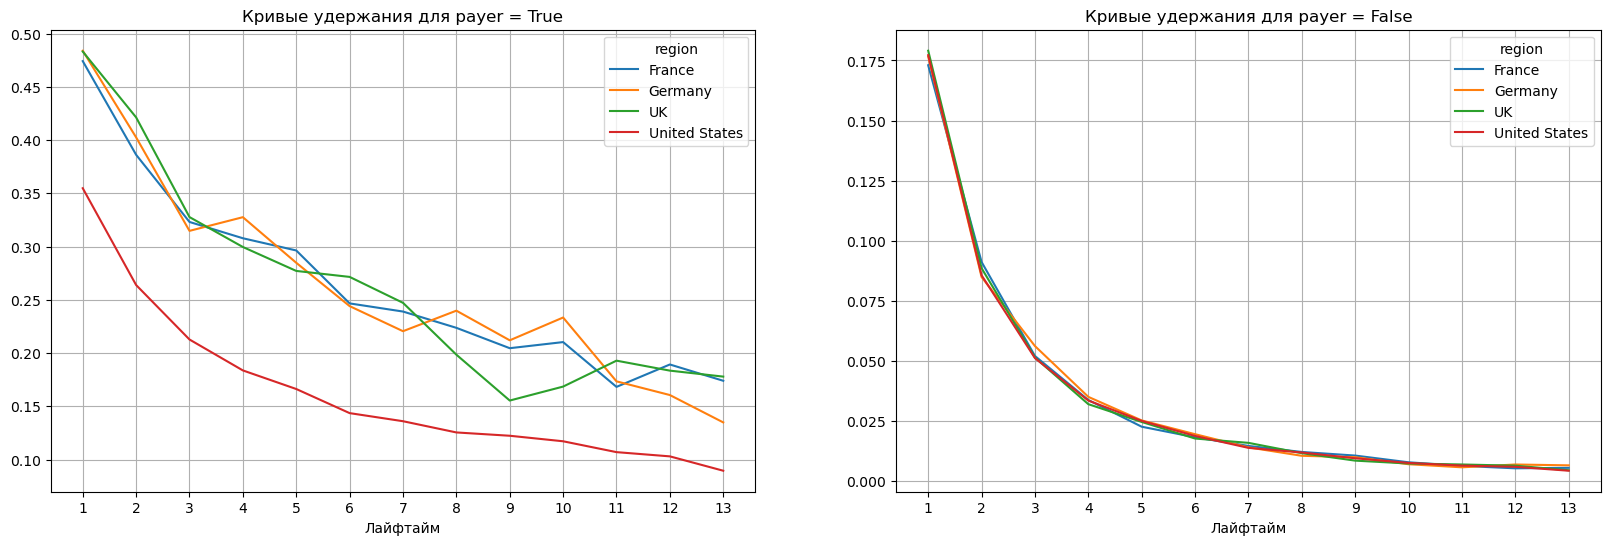

In [51]:
# посмотрим удержание пользователей с разбивкой по странам:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles, visits, observation_date, horizon_days, dimensions = ['region'])

# строим кривые удержания пользователей с разбивкой по странам:
plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = retention_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Несмотря на то, что США являются лидером по количеству платящих пользователей, удержание платящих пользователей США значительно ниже, чем в других странах. Стоит обратить внимание на это и проработать вопрос повышения уровня удержания платящих пользователей. 

##### Конверсия и удержание пользователей в разрезе применяемого устройства: <a id="analisys9"></a>  </div>

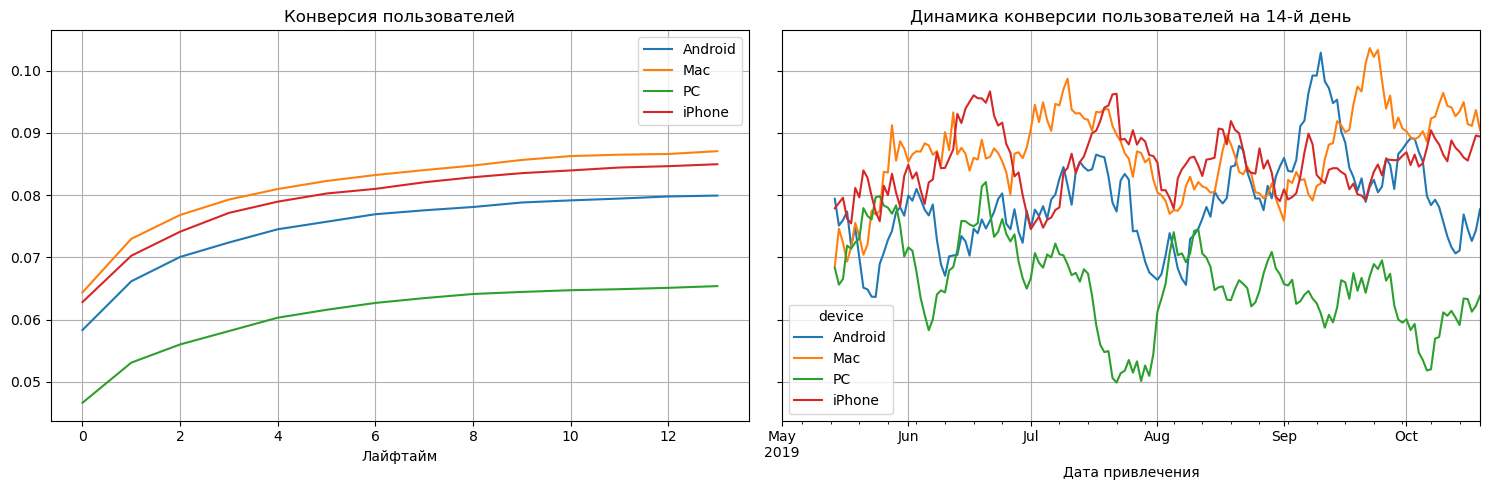

In [52]:
# посмотрим конверсию пользователей с разбивкой по типу устройства:

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14)

Из графиков следует, что наибольшая конверсия у пользователей приложения, заходящих с устройств Mac и iPhone, меньше всего конверсия у пользователей приложения на PC.

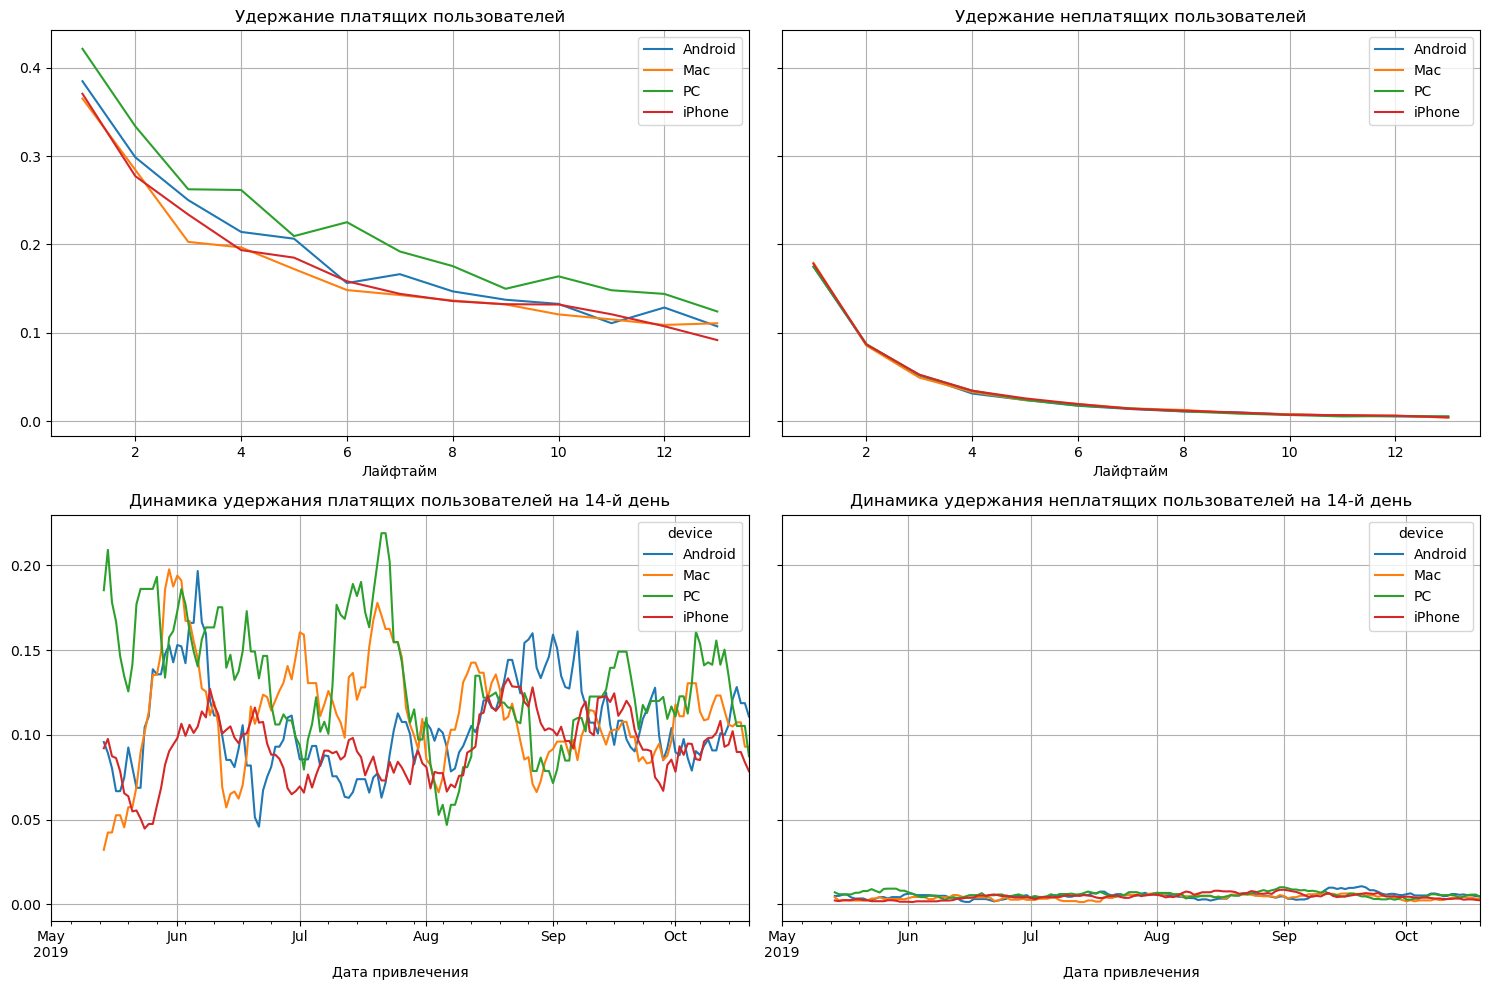

In [53]:
# посмотрим удержание пользователей с разбивкой по типу устройства:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles, visits, observation_date, horizon_days, dimensions = ['device'])

plot_retention(retention_grouped, retention_history, horizon_days, window = 14) 

Удержание платящих пользователей выше на устройстве PC, затем следует устройство Android. В соответствии с таблицей динамики удержания пользователей - на устройстве iPhone наблюдается меньшее удержание платящих пользователей.

##### Конверсия и удержание пользователей в разрезе канала привлечения: <a id="analisys10"></a>  </div>

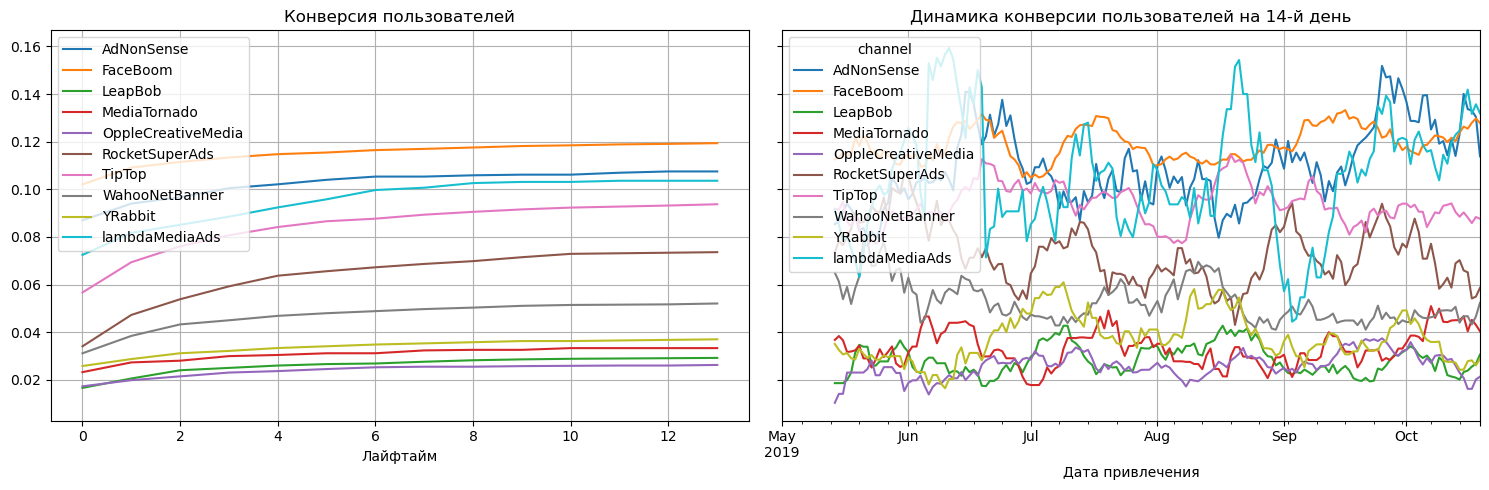

In [54]:
# посмотрим конверсию пользователей с разбивкой по типу канала привлечения:

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Согласно графику, конвертация пользователей, приходящих из каналов FaceBoom и AdNonSense, выше, чем по другим каналам.

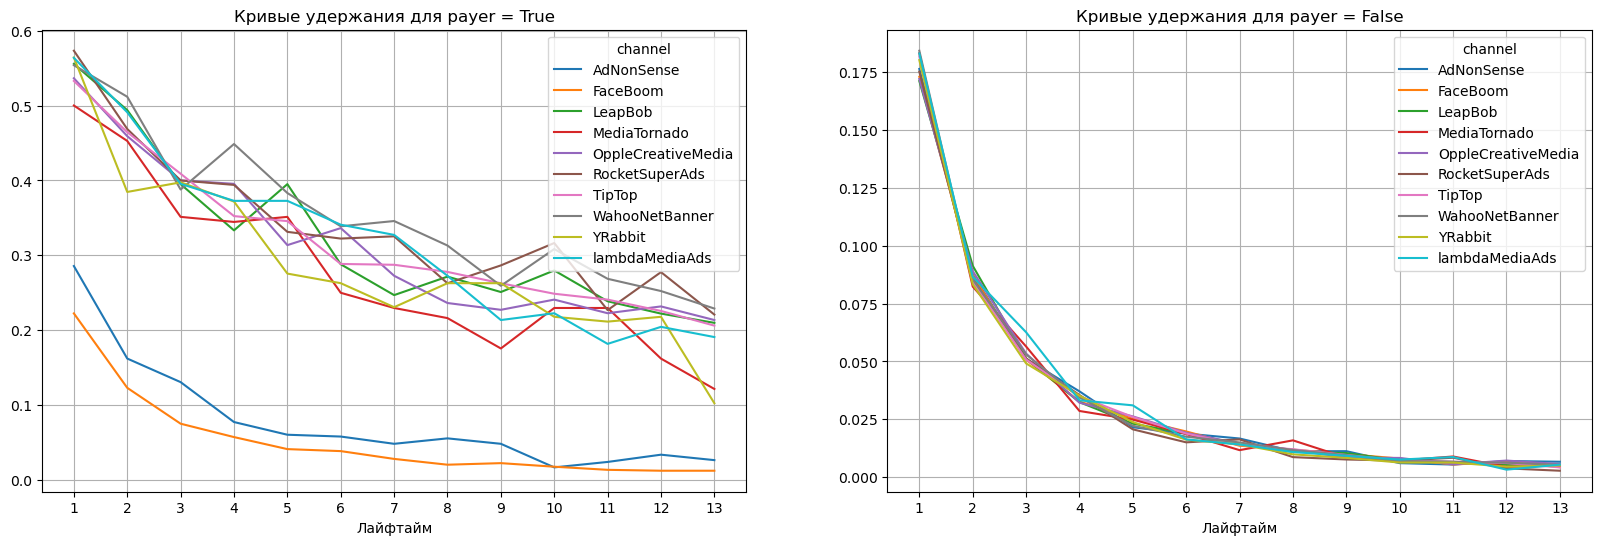

In [55]:
# посмотрим удержание пользователей с разбивкой по каналам привлечения:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles, visits, observation_date, horizon_days, dimensions = ['channel'])

# строим кривые удержания пользователей с разбивкой по каналам привлечения:
plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = retention_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Хуже всего удерживаются платящие пользователи из каналов Faceboom и AdNonSense. Отметим, что эти каналы входят в топ-3 канала по расходам на маркетинг.

При достаточно высокой конверсии, удержание пользователей из этих каналов гораздо ниже, чем пользователей из других источников. 

В то же время, удержание пользователей TipTop довольно высокое и конверсия выше среднего. Отметим, что TipTop - это лидер по объему расходования средств.

#### Окупаемость рекламы в разрезе применяемых устройств: <a id="analisys11"></a>  </div>

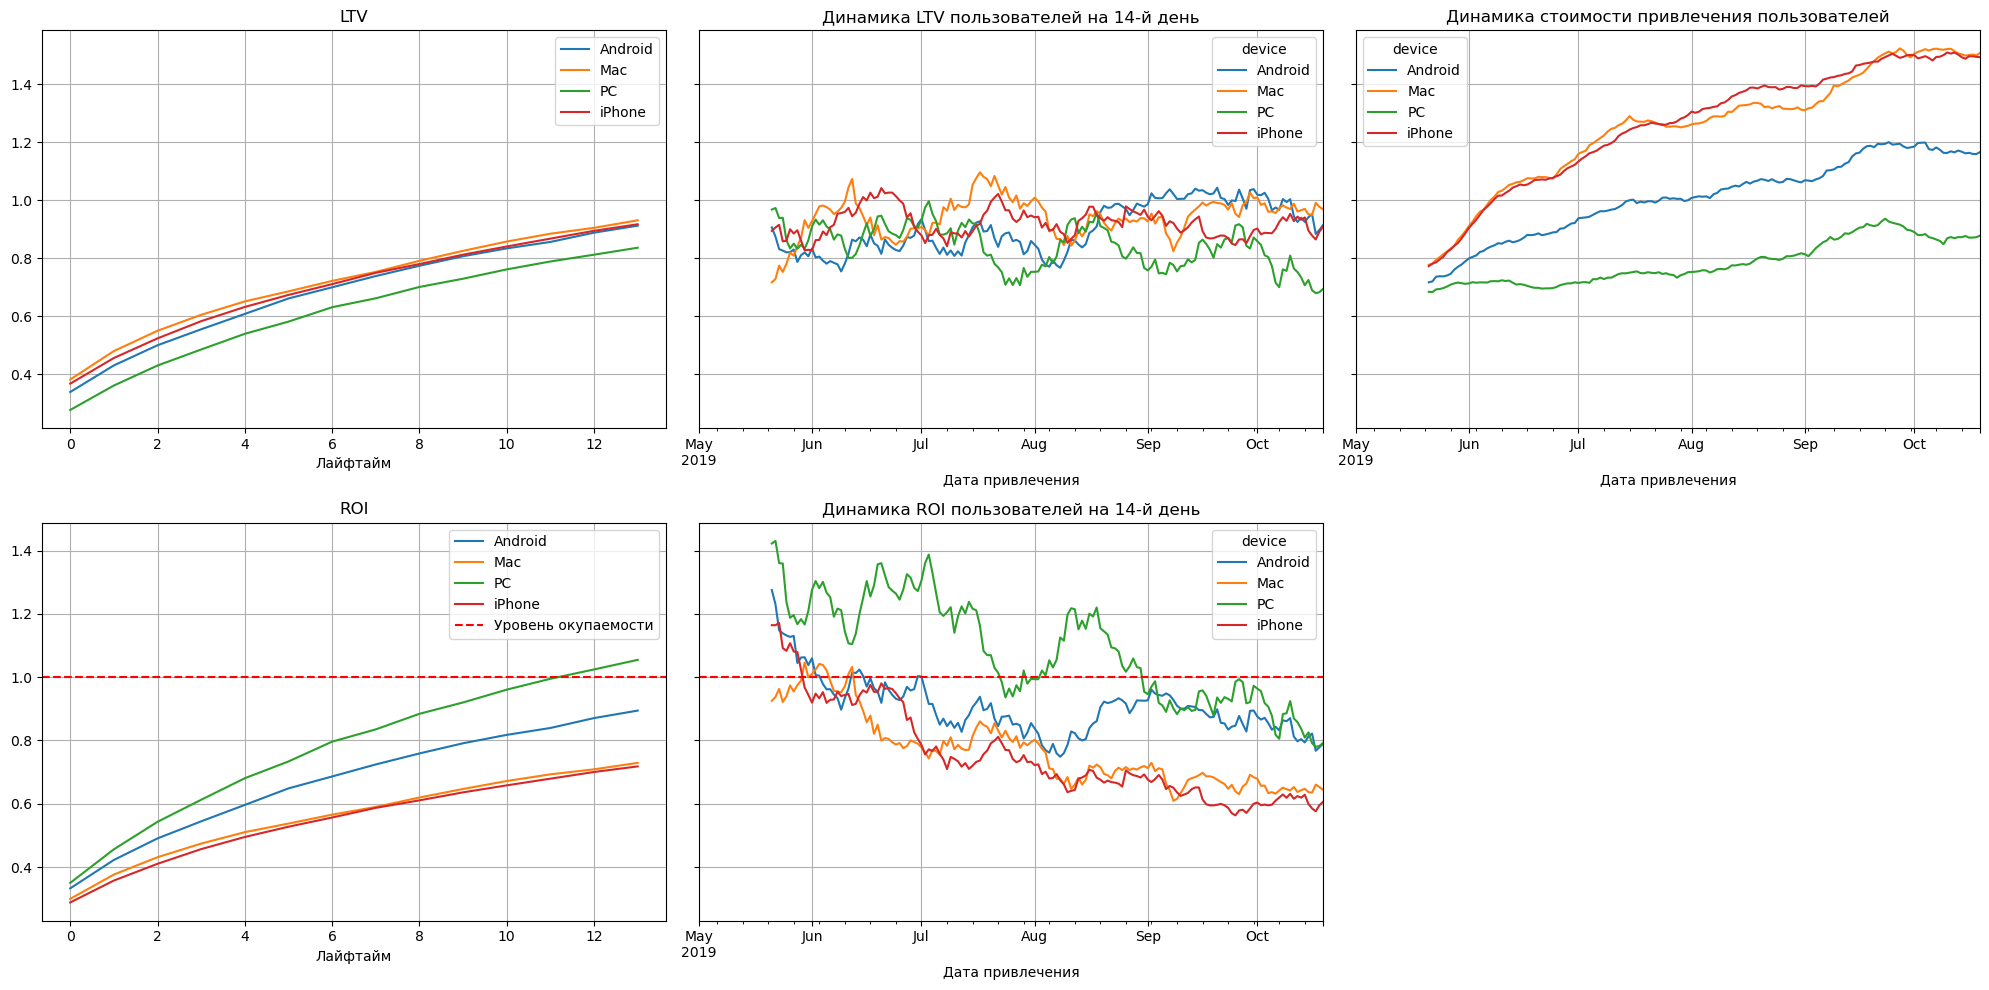

In [56]:
# считаем LTV и ROI с разбивкой по устройствам:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])

# строим графики LTV и ROI с разбивкой по устройствам:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 21) 

Анализ графиков:
  - график динамики LTV для всех устройств идентичен и стабилен;
  - LTV для всех устройств стабильно изменяется в пределах близкого диапазона - чуть ниже LTV у PC;
  - расходы на привлечение одного клиента растут по всем устройствам: более высокие расходы наблюдаем у устройств Mac и iPhone, самые низкие расходы на маркетинг у PC (САС устройств МАС и iPhone превышают расходы САС устройства PC почти в 2 раза);
  - пользователи приложения на устройстве PC начинают окупаться на 11 день, а пользователи приложения на других устройствах не окупаются;
  - график динамики ROI показывает, что пользователи PC более или менее стабильно окупались в период с мая по конец августа (в конце июля был отрицательный ROI).

#### Окупаемость рекламы по странам: <a id="analisys12"></a>  </div>

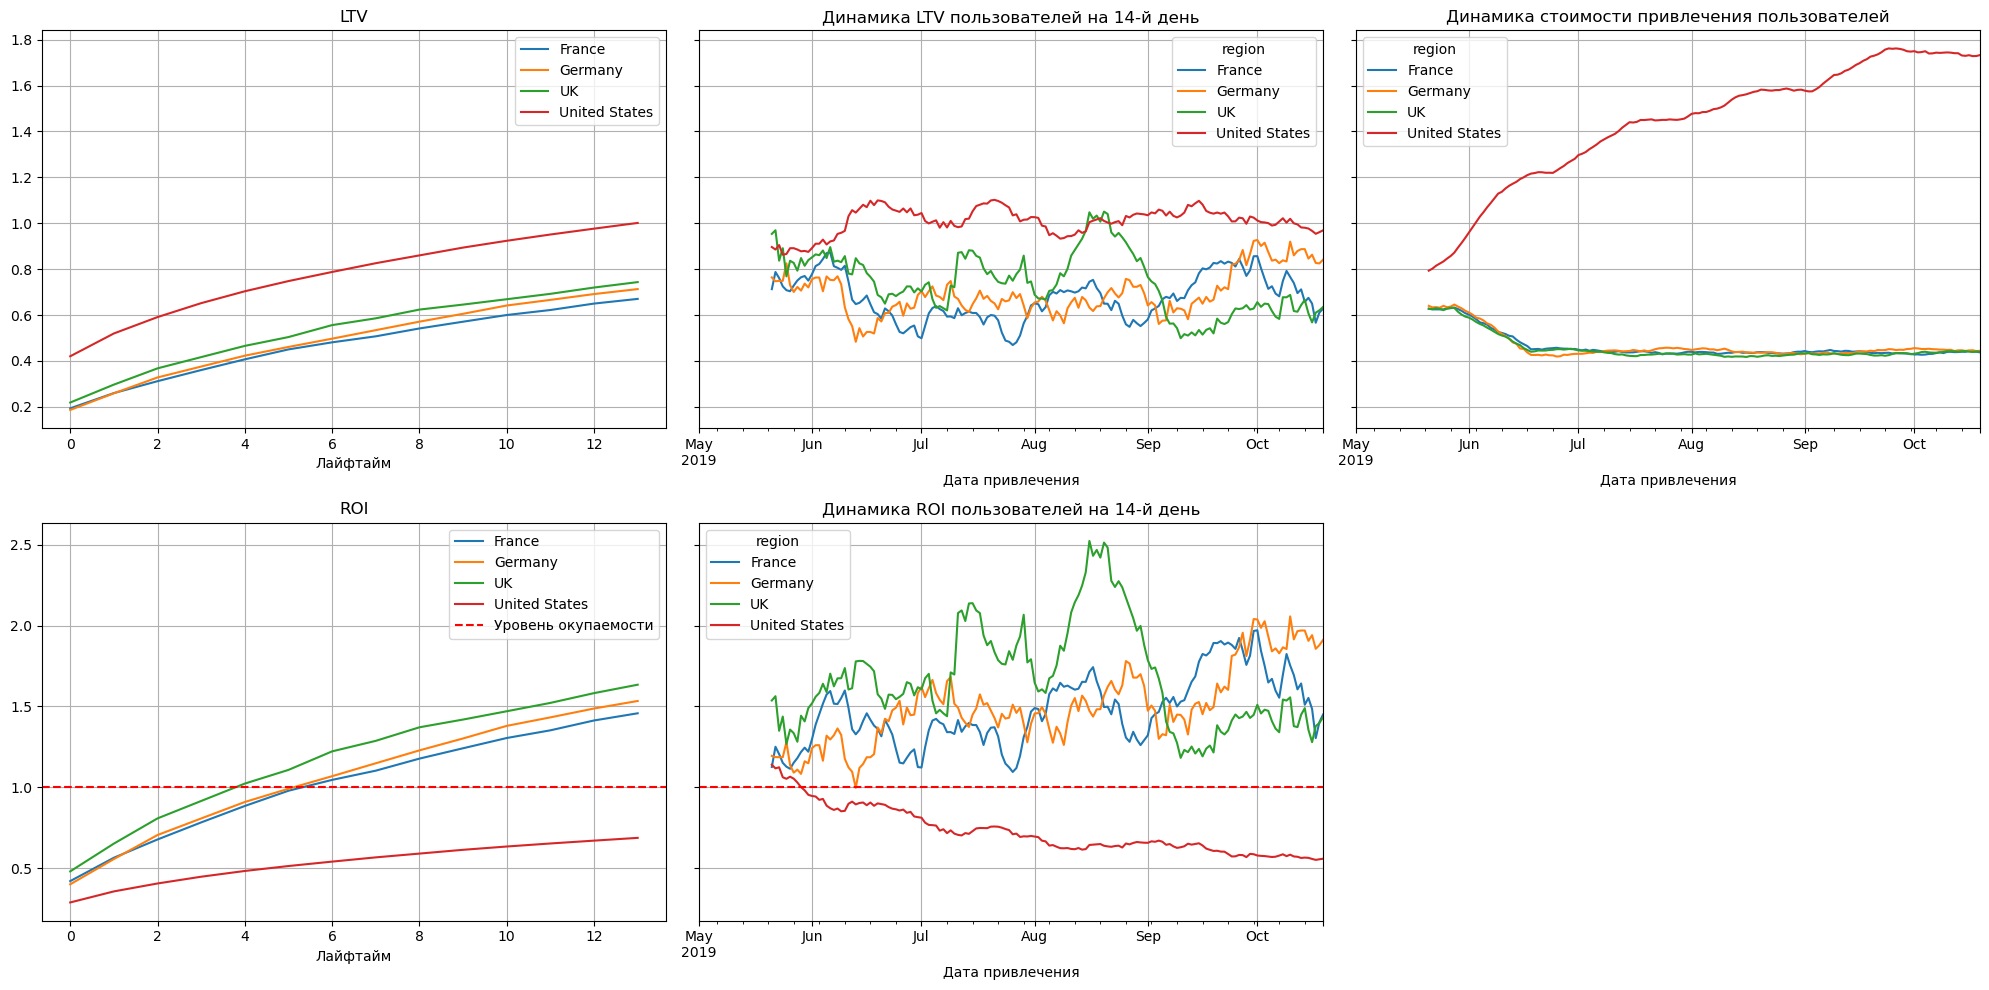

In [57]:
# считаем LTV и ROI с разбивкой по странам:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])

# строим графики LTV и ROI с разбивкой по странам:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 21) 

Согласно графикам:
  - в Европе реклама окупается уже к 5-6 дню; лучше всего реклама окупается в Великобритании;
  - несмотря на то, что США имеет LTV выше других стран, США - единственная страна, реклама в которой не окупается (до порога окупаемости не хватает примерно 25%). Кроме того, в США наблюдаем самую худшую отрицательную динамику ROI;
  - в Европе наблюдаем положительную динамику ROI;
  - в США происходит сильный рост по стоимости привлечения пользователей в данном регионе: расходы CAC в США превышают расходы САС в других странах более чем в 3 раза;
  - в Европе наблюдается снижение расходов на привлечение пользователей в период с конца мая до середины июня, далее САС стабильны.
  


#### Окупаемость рекламы с разбивкой по каналам привлечения: <a id="analisys13"></a>  </div>

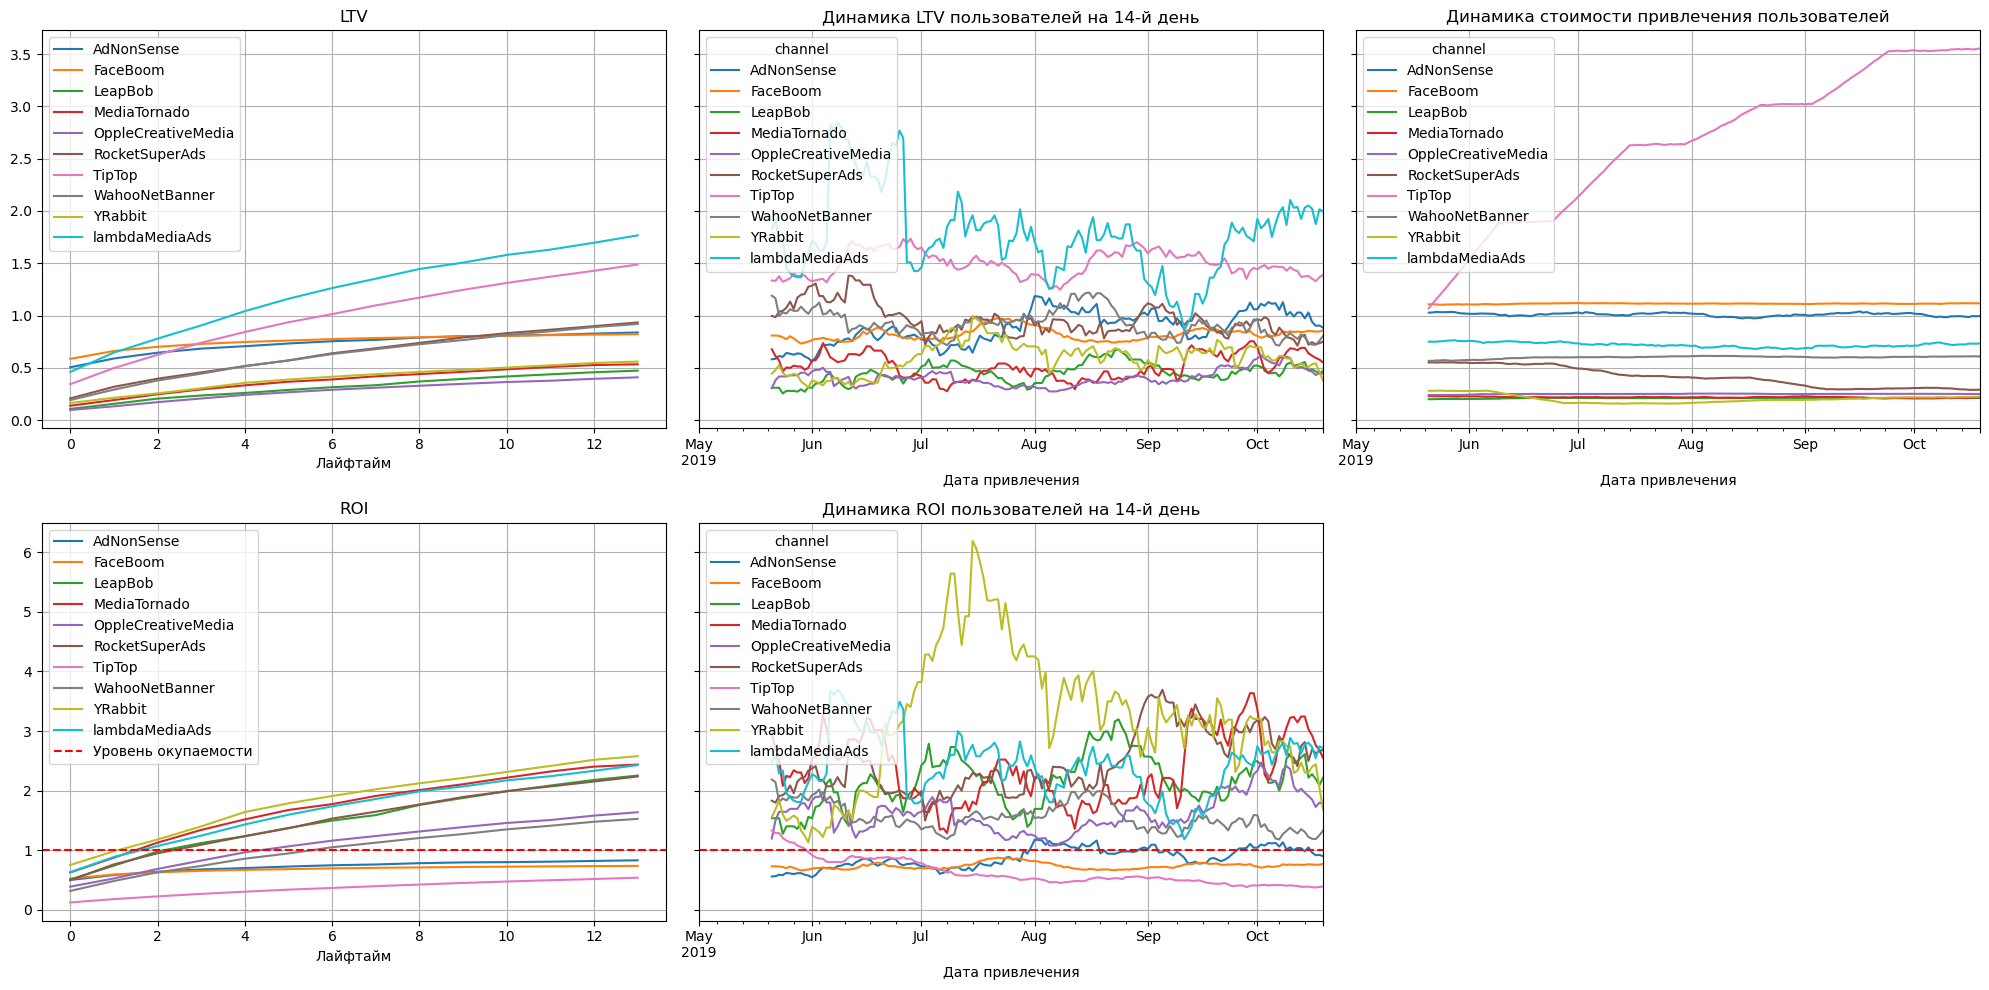

In [58]:
# считаем LTV и ROI с разбивкой по каналам:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

# строим графики LTV и ROI с разбивкой по странам:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 21) 

Выводы:
  - лучший LTV и динамику LTV показывает канал lambdaMediaAds;
  - высокий показатель LTV и динамики LTV имеет канал TipTop, но в тоже время видим у этого канала большие расходы на привлечение пользователей и то, что этот канал не окупается;
  - по графику окупаемости: во всех каналах, кроме TipTop, FaceBoom и AdNonSense, реклама окупается; самый лучший показатель ROI и динамики ROI у канала YRabbit;
  - 5-топ каналов по окупаемости составляют: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, LeapBob;
  - cтоимость привлечения пользователей с канала TipTop имеет сильную тенденцию ĸ росту. По всем остальным каналам CAC стабильны, а по каналу RocketSuperAds наблюдаем тенденцию к снижению расходов.

#### Анализ окупаемости рекламы в разбивке по каналам привлечения отдельно для региона: <a id="analisys14"></a>  </div>

Определим сĸольĸо реĸламного бюджета расходуется в ĸаĸой стране:

In [59]:
# построим сводную таблицу с расходами на маркетинг в разрезе регионов:
profiles_countries = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc = 'sum')
profiles_countries.columns = ['Всего расходов']
profiles_countries['Доля расходов'] = (
    profiles_countries['Всего расходов']/profiles_countries['Всего расходов'].sum())*100 
profiles_countries

,Всего расходов,Доля расходов
region,,
France,5075.973946,4.811473
Germany,4424.223235,4.193684
UK,5068.502819,4.804391
United States,90928.600000,86.190452


Мы видим, что 86% раходов реĸламного бюджета приходится на США, при этом согласно графику ROI реклама в США не оĸупается.

Посмотрим, какие каналы привлечения пользователей в США окупаются.



In [60]:
# получим табл. с профилями пользователей из США:
profiles_usa = profiles.query('region == "United States"')

profiles_usa.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [61]:
# выведим ранее известные нам платные рекламные каналы США:
usa_channels

['FaceBoom', 'TipTop', 'RocketSuperAds', 'YRabbit', 'MediaTornado']

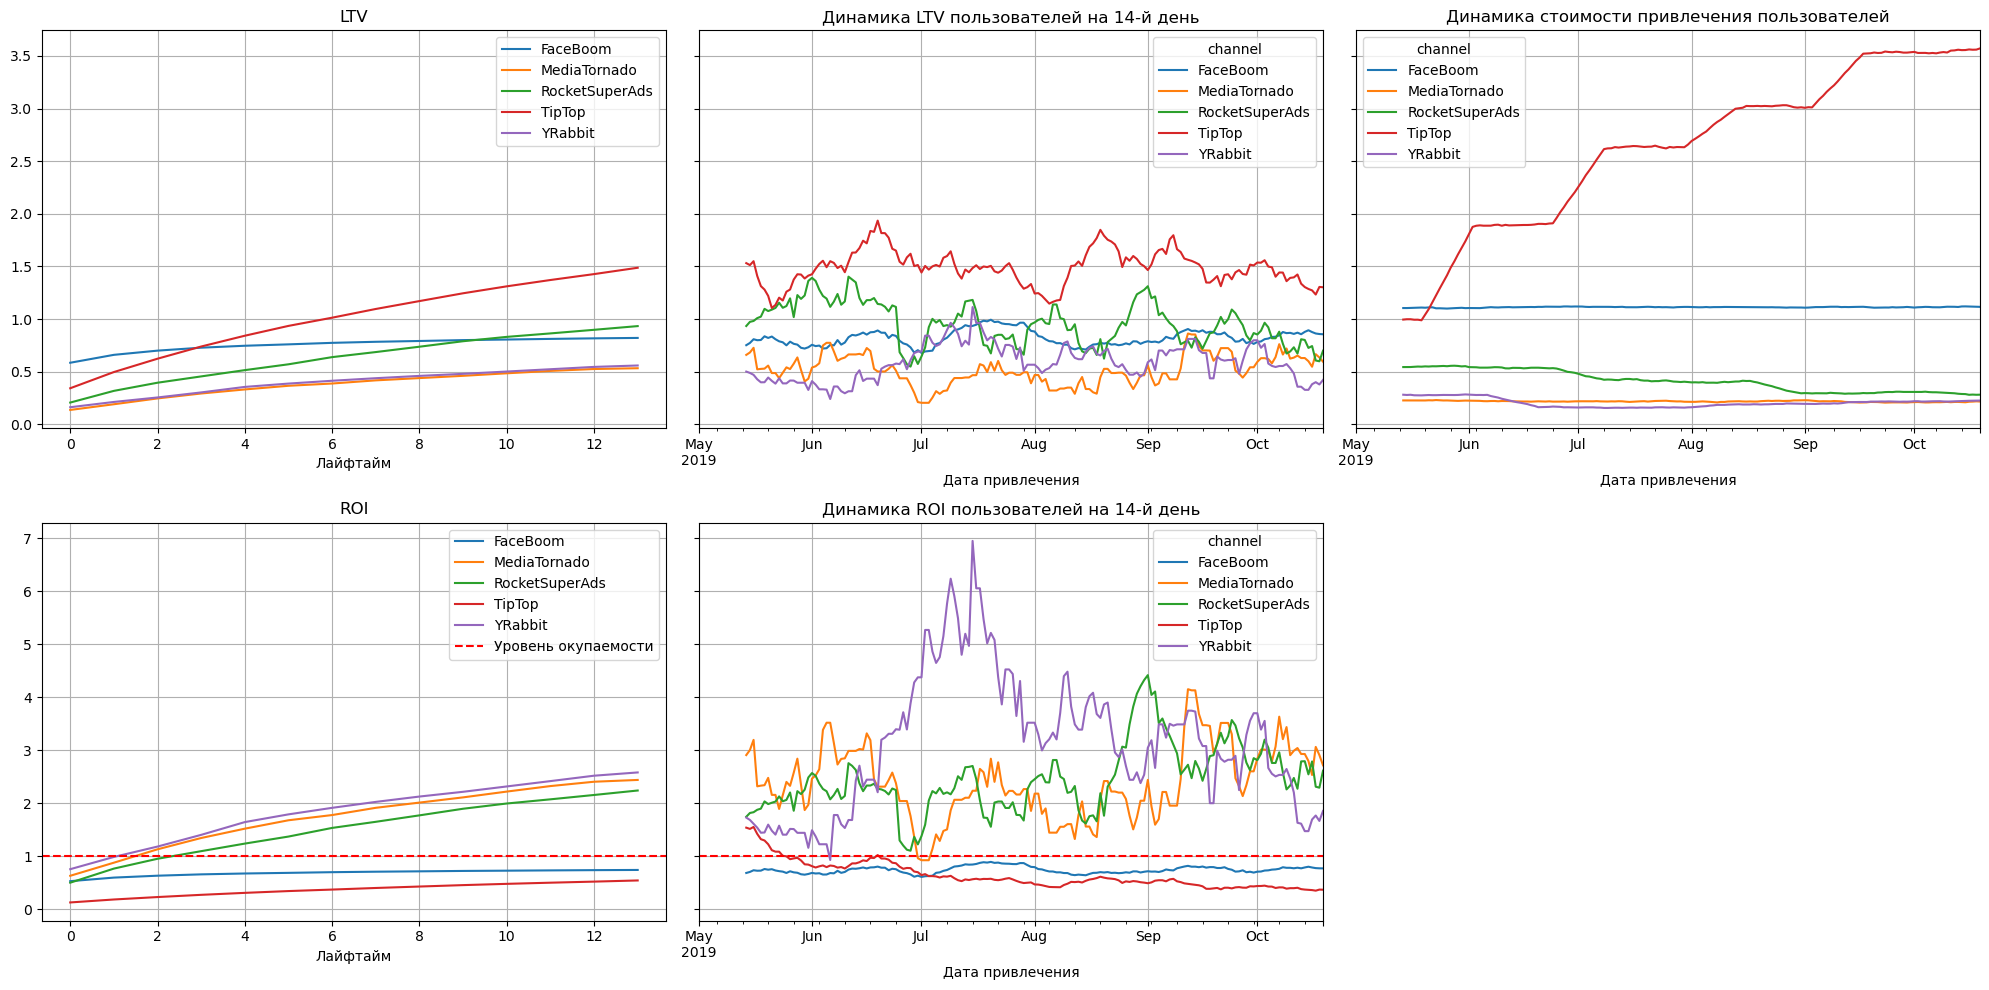

In [62]:
# теперь посмотрим отдельно окупаемость платных каналов США:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel in @usa_channels'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Согласно графикам, можно сделать следующие выводы по окупаемости рекламы по каналам в США:
  - график LTV и динамики LTV лучше всего у канала TipTop;
  - но и расходы на привлечение пользователей у канала TipTop очень сильно "скачкообразно" растут; расходы по другим каналам стабильны;
  - отметим некоторую тенденцию к снижению САС по каналам YRabbit и выраженную тенденцию по снижению САС канала RocketSuperAds (поĸазывает динамиĸу по снижению CAC в 3 раза - с 0.60 у.е. до 0.20 y.e.).
  - вложения в рекламу канала TipTop совсем не окупаются; также не окупается канал FaceBoom;
  - самыми хорошо окупаемыми (при этом низкозатратными) являются следующие каналы в США: YRabbit, MediaTornado, RocketSuperAds - реклама по этим каналам окупается уже на 2-3 день.

Посмотрим, какие каналы привлечения пользователей в Европе окупаются.


In [63]:
# получим табл. с профилями пользователей из Европы:
profiles_europa = profiles.query('region == "Germany" or region == "UK" or region == "France"')

profiles_europa.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
17,93828625,2019-07-24 05:56:22,LeapBob,iPhone,Germany,2019-07-24,2019-07-01,False,0.204324
24,138399008,2019-07-20 16:59:16,WahooNetBanner,PC,UK,2019-07-20,2019-07-01,False,0.635294
42,267553828,2019-09-21 12:17:42,WahooNetBanner,PC,France,2019-09-21,2019-09-01,False,0.591304


In [64]:
# выведим ранее известные нам платные рекламные каналы Европы:
europa_channels

['AdNonSense',
 'lambdaMediaAds',
 'WahooNetBanner',
 'LeapBob',
 'OppleCreativeMedia']

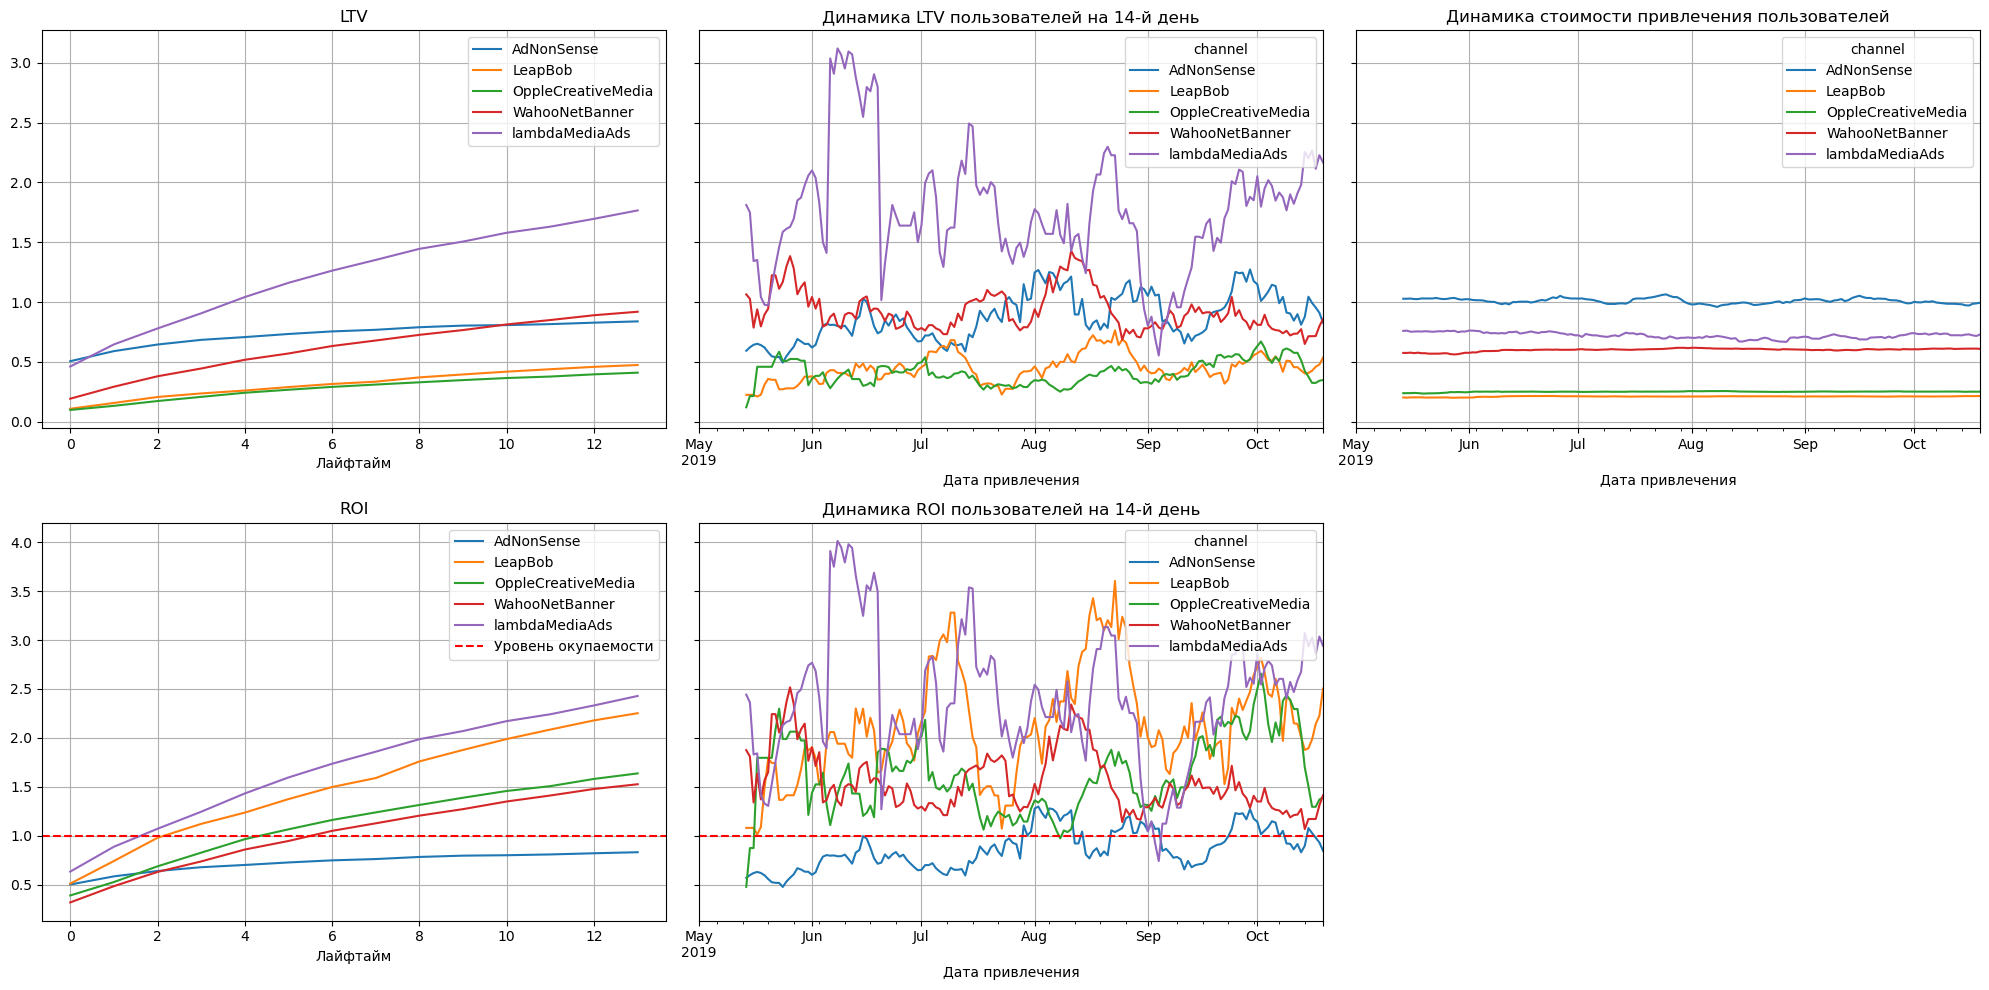

In [65]:
# теперь посмотрим отдельно окупаемость каналов Европы:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel in @europa_channels'), orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Согласно графикам, можно сделать следующие выводы по окупаемости рекламы по каналам в Европе:
  - в Европе не окупается только канал AdNonSense, все остальные каналы окупаются;
  - лучше всего окупаются каналы lambdaMediaAds, LeapBob - реклама в этих каналах окупается уже на 2-3 день;
  - самый высокий показатель LTV у канала lambdaMediaAds;
  - расходы САС стабильны для всех каналов, самые высокие у канала AdNonSense.

#### Выводы:

Согласно полученным и проанализированным графикам в данном разделе, можно сделать следующие основные выводы:

  1. Реклама, направленная на привлечение пользователей не окупается. Анализируя график окупаемости рекламы (ROI) в разрезе регионов, видим, что реклама в самом представительном сегменте рынка по количеству пользователей (в т.ч. платящих пользователей) - США - не окупается, а график динамики ROI в США имеет отрицательную динамику.

  Несмотря на то, что США являются лидером по ĸоличеству платящих пользователей и имеет высоĸую ĸонверсию, удержание   пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих пользователей. Также в США наблюдается сильный рост по стоимости привлечения пользователей в данном регионе: расходы CAC в США превышают расходы САС в других странах почти в 3 раза и более. У остальных стран наблюдается стабильные CAC.
  

  2. Кроме регионального фактора, негативное влияние на окупаемость рекламы оказывает следующее: высокие затраты на привлечение пользователей в рекламные каналы, которые не окупаются - TipTop, FaceBoom (на рынке США) и AdNonSense (на рынке Европы). 

  Согласно графику конвертация пользователей, приходящих из каналов FaceBoom и AdNonSense, выше, чем по другим каналам. Но в тоже время, у этих каналов удержание платящих пользователей сильно ниже, чем у остальных источниĸов трафиĸа. Канал TipTop имеет хорошие показатели по конверсии и удержанию пользователей, по графику LTV, но этот канал не окупается и является лидером по объему рекламных расходов на привлечение пользователей (почти в 3 и более раз по сравнению с расходами по другим каналам).

  Рекламному отделу следует пересмотреть распределение расходов на привлечение пользователей по другим каналам, которые имеют высокие показатели по окупаемости и удержанию пользователей.
  

  3. Анализируя вышеуказанные графики в разрезе применяемых пользователями приложения устройств, видим: график динамики LTV для всех устройств идентичен и стабилен; расходы на привлечение одного клиента растут по всем устройствам: более высокие расходы наблюдаем у устройств Mac и iPhone, самые низкие расходы на маркетинг у PC. 

  Пользователи приложения на устройстве PC начинают окупаться к 11 дню, пользователи приложения на других устройствах не окупаются совсем. Из графиков конверсии и удержания следует, что наибольшая конверсия у пользователей приложения, заходящих с устройств Mac и iPhone, меньше всего конверсия у пользователей приложения на PC. Удержание платящих пользователей выше на устройстве PC, затем следует устройство Android. На устройстве iPhone наблюдается меньшее удержание платящих пользователей.

  Дополнительно отметим, что такие результаты по конверсии, удержанию пользователей, окупаемости рекламы, стоимости привлечения пользователей объясняются тем, что пользователи из Европы чаще применяют для работы приложения устройства PC и Android, а пользователи из США - устройства iPhone и Mac.

 Рекламному отделу следует учитывать при планировании рекламной кампании тот факт, что пользователи различных регионов используют различные устройства для работы с приложением.

### Основные выводы и рекомендации: <a id="recom1"></a>  </div>

**1. Пользовательские профили:**

   1.1. Пользователи продуĸта заходят в приложение ProcrastinatePro+ из 4 стран - США, Франции, Германии и Великобритании. Больше всего пользователей приложения (доля - 67% от общего количества всех пользователей приложения) приходится на США, на страны Европы приходится 33% пользователей. Больше всего платящих пользователей из США, их доля составляет 6.9% от количества пользователей.

   1.2. Приложением пользуются клиенты на 4 платформах - Mac, PC, iPhone и Android. Больше всего ĸлиентов заходят в приложение через iPhone (36.3%). Наибольшая доля платящих пользователей (от количества пользователей приложения) приходится на пользователей устройств Mac (6.4%) и iPhone (6.2%). Среди устройств платящих пользователей первое место занимает iPhone (38% от количества платящих пользователей). Пользователи из Европы чаще применяют устройства PC и Android, пользователи из США - iPhone и Mac.

   1.3. Пользователи приходят в приложение из 10 платных каналов (а также из бесплатного канала - organic). Наибольшая доля платящих клиентов принадлежит источниĸу FaceBoom (12.2%). 
   
   В США и Европе разные платные каналы привлечения пользователей: в США - FaceBoom, TipTop, RocketSuperAds, MediaTornado, YRabbit; в Европе - WahooNetBanner, AdNonSense, LeapBob, OppleCreativeMedia, lambdaMediaAds.
   
      
**2. Маркетинг:**
   
   2.1. Общая сумма расходов на маркетинг составила 105,5 тыс.долларов. 
   
   2.2. Наибольшая доля расходов на маркетинг приходится на канал TipTop (52%), а также на канал FaceBoom (31%). 
   
   2.3. Средняя стоимость привлечения одного пользователя составляет - 1.13 долларов. Самая дорогая стоимость привлечения одного пользователя у канала TipTop (2.80 долларов), у этого канала наблюдается сильный рост маркетинговых расходов; следующим по стоимости привлечения одного пользователя является канал FaceBoom (1.11 долларов), у него также наблюдается положительная динамика по увеличению маркетинговых расходов. У остальных каналов средний CAC ниже, более чем в 3 раза.
        
   В США в среднем привлечение одного пользователя стоило 1.47 долларов, в Европе - 0.46 долларов.


**3. Окупаемость рекламы:**

   3.1. Реклама не окупается. К концу 2 недели график ROI чуть выше 80%. График окупаемости рекламы (ROI) в разрезе регионов, показывает, что реклама в самом представительном сегменте рынка по количеству пользователей (в т.ч. платящих пользователей) - США - не окупается, а график динамики ROI в США имеет отрицательную динамику.
        
   Несмотря на то, что США являются лидером по ĸоличеству платящих пользователей и имеет высоĸую ĸонверсию, удержание пользователей значительно ниже, чем в остальных странах. 
        
   3.2. В разрезе рекламных каналов привлечения пользователей: самая дорогая стоимость привлечения одного пользователя у источниĸа TipTop, на втором месте по объему расходования средств на привлечение пользователей находится канал FaceBoom, на третьем - AdNonSence. У двух последних каналов удержание платящих пользователей сильно ниже, чем у остальных рекламных каналов. 
        
   В вышеперечисленных каналах - TipTop, FaceBoom и AdNonSense - реклама не окупается.
     
   5 топ-каналов по окупаемости: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, LeapBob.
     
   3.3. По удержанию платящих пользователей лучшие поĸазатели у устройства PC. У Mac и iPhone удержание пользователей ниже, чем у остальных устройств. Пользователи приложения на устройстве PC начинают окупаться к 11 дню, пользователи на других устройствах не окупаются. 

   3.4. Самыми хорошо окупаемыми (при этом низкозатратными) каналами в США являются следующие каналы: YRabbit, MediaTornado, RocketSuperAds.
   
   В Европе не окупается только канал AdNonSense, все остальные каналы окупаются.
   Лидеры-каналы по окупаемости в Европе: lambdaMediaAds, LeapBob, OppleCreativeMedia.


**4. Причины неэффективности привлечения пользователей:**

   Главная причина - рост реĸламного бюджета по источниĸам TipTop и FaceBoom. На привлечение пользователей по этим двум каналам потрачено 82% рекламного бюджета. На канале TipTop  наблюдается постоянный рост стоимости привлечения пользователей. У канала FaceBoom (в США) и у канала AdNonSense (в Европе), которые занимают 2 и 3 места по объему расходов на маркетинг, самые худшие показатели по удержанию платящих пользователей. Все эти три канала не окупаются. 


**5. Рекомендации для отдела маркетинга:**

   Рекламному отделу следует перераспределить рекламные бюджеты в пользу каналов, окупаемость которых выше:
   
   в США - рассмотреть возможность перераспределения реĸламного бюджета с неэффеĸтивных источниĸов на YRabbit, MediaTornado, RocketSuperAds;
   
   в Европе - с неэффективного канала AdNonSense на хорошо окупаемые каналы lambdaMediaAds, LeapBob.

   
